# **WHICH PROGRAMMING LANGUAGE SHOULD I LEARN?**

Let's find out what's the most searched coding language on Google! <br>

pytrends documentation:
https://pypi.org/project/pytrends/<br>
matplotlib documentation: https://matplotlib.org/


In [1]:
#install pytrends
!pip install pytrends

In [3]:
from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')     
                
#extract data about weekly searches of certain keywords
keywords = ["Python", "R", "C++", "Java", "HTML"]
pytrends.build_payload(keywords, timeframe='today 5-y')

In [4]:
#store kewords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)

data.tail()

,Python,R,C++,Java,HTML
date,,,,,
2020-05-24,27,51,83,21,12
2020-05-31,27,52,86,21,12
2020-06-07,27,52,86,21,12
2020-06-14,27,50,82,21,12
2020-06-21,26,51,81,20,12


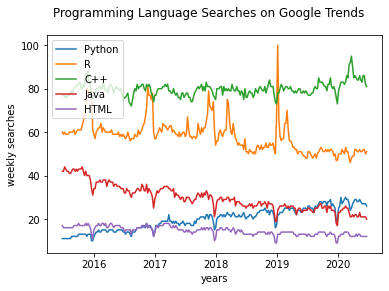

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

#plot data
plt.plot(data)

#add titles
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')

plt.show()
plt.savefig('best_language.png')

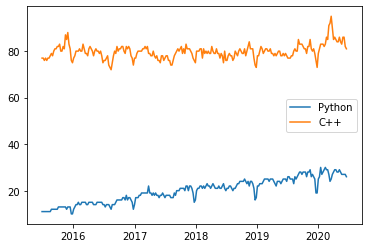

In [6]:
#compain language popularity
focus = ['Python', 'C++'] 

plt.plot(data[focus])
plt.legend(focus)

# **WHAT ARE THE TOP COUNTRIES SEARCHING FOR PYTHON?**

In [8]:
import pandas as pd

#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)

#convert to dataframe
data2 = data2.to_frame()

data2

,Python
geoName,
China,47
Israel,31
St. Helena,25
Singapore,20
South Korea,20
Cuba,19
Iceland,19
Estonia,18
Hong Kong,17


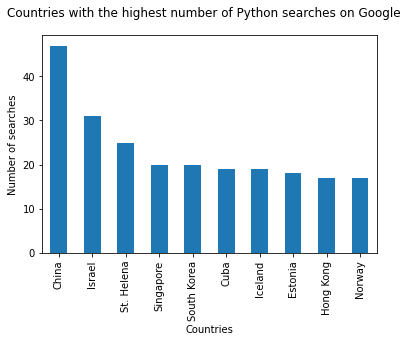

In [9]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

## **PLOTTING RESULTS FOR MULTIPLE COUNTRIES**

In [10]:
data3 = country_data[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,19,12,30,25,14
Curaçao,5,32,46,8,9
Cyprus,11,23,43,13,10
Czechia,13,22,39,16,10
Côte d’Ivoire,4,15,51,24,6


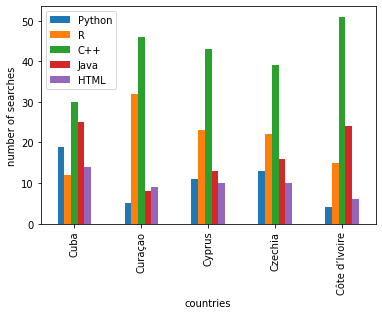

In [11]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()